Visualize Oriented Anchor Boxes

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from network import RetinaNet
import torch
from dataset import xywha2vertex
from dataset import convert_bbox_format

img_mean = np.array([0.485, 0.456, 0.406])
img_std = np.array([0.229, 0.224, 0.225])

def visualize_anchor(image, bboxes):
    _, axes = plt.subplots(3,2, figsize=(15, 15))
    axes = axes.flatten()
    img_plt = image[0].permute(1,2,0).cpu().numpy()
    img_plt = img_std * img_plt + img_mean
    img_plt = np.clip(img_plt, 0, 1)
    for i, bbox in enumerate(bboxes):
        axes[i].imshow(img_plt)
        for b in bbox:
            b = convert_bbox_format(b)
            cx, cy, w, h, angle = b
            
            ##convert bounding box to the vertex
            vertices = xywha2vertex(np.array([[cx, cy, w, h, angle]]), is_degree=True)
            vertices = vertices.reshape(-1, 2)  # Reshape for patches.Polygon
            
            ##Add the bounding box patch
            rect = patches.Polygon(vertices, closed=True, linewidth=1, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)

In [2]:
model = RetinaNet(fpn=True, p67=True)

c:\Users\wyatt\.conda\envs\MLCuda\Lib\site-packages\torch\overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
c:\Users\wyatt\.conda\envs\MLCuda\Lib\site-packages\torch\overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
c:\Users\wyatt\.conda\envs\MLCuda\Lib\site-packages\torch\overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
c:\Users\wyatt\.conda\envs\MLCuda\Lib\site-packages\torch\overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,
c:\Users\wyatt\.conda\envs\MLCuda\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:35

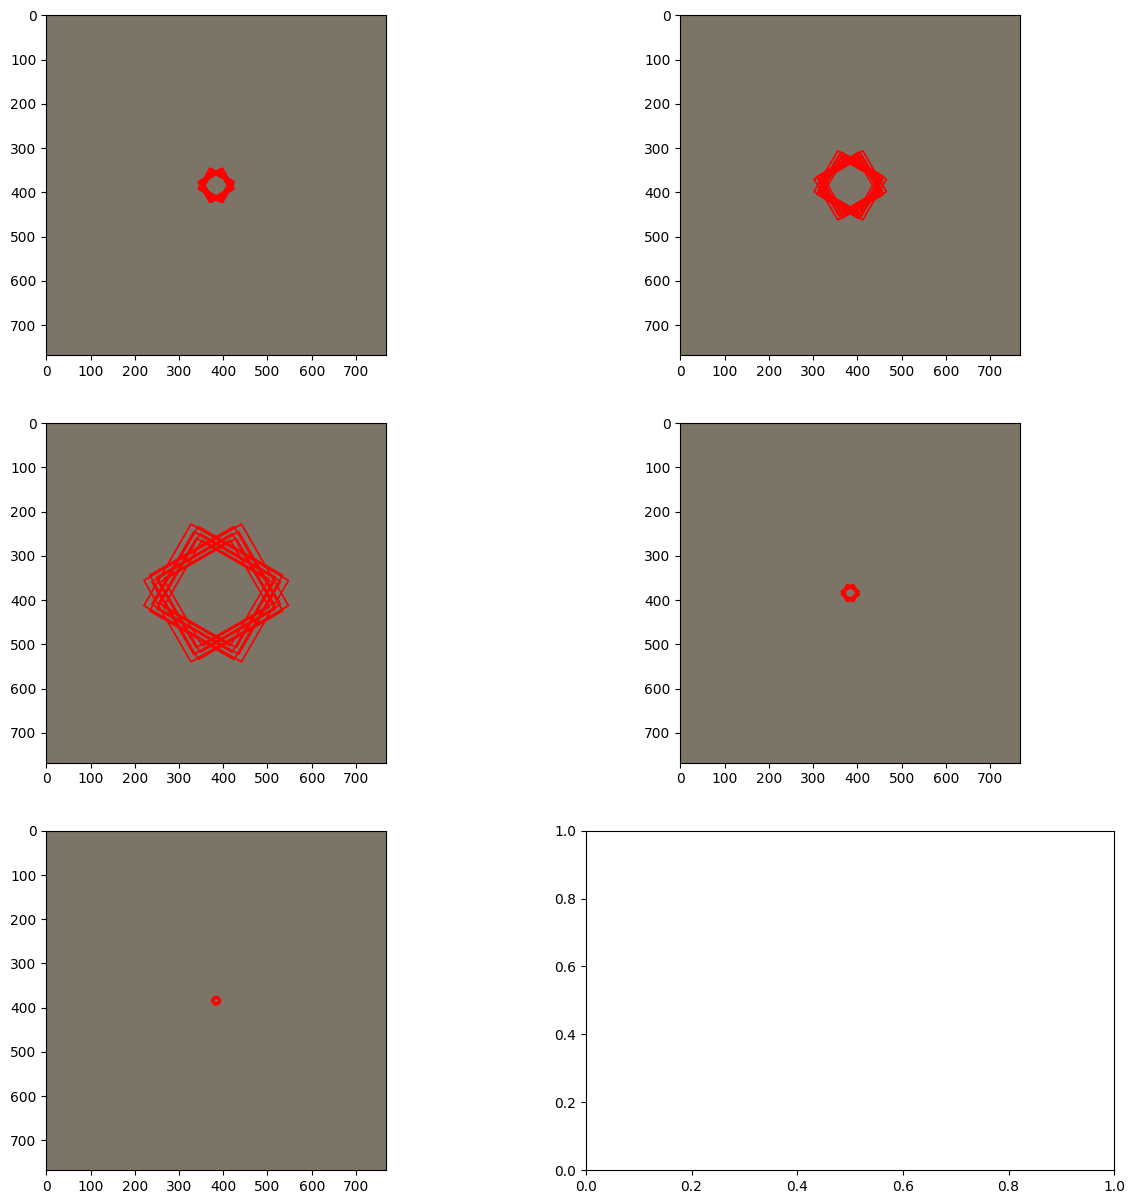

In [3]:
image = torch.zeros((1, 3, 768, 768)).float()
outs = model(image)
anchor_pyramid = []
for out in outs:
    _, _, anchor = out
    B, A, H, W = anchor.shape
    anchor = anchor.reshape(B, A // 5, 5, H, W).squeeze(0).cpu().numpy()
    anchor_pyramid.append(anchor[..., H//2, W//2])
visualize_anchor(image, anchor_pyramid)

<img src="anchor.png" width="800" />
<!-- ![anchor.png](anchor.png) -->